by: Quang Dong Nguyen  
provided by: Job Ready Master

# Explain Dataset
### Orders.csv
- Row ID: A unique identifier for each row in the dataset.
- Order ID: An identifier for each order. Multiple rows can share the same Order ID if the order - contains multiple items.
- Order Date: The date on which the order was placed.
- Ship Date: The date on which the order was shipped.
- Ship Mode: The mode of shipping used for the order.
- Customer ID: A unique identifier for each customer.
- Customer Name: The name of the customer who placed the order.
- Segment: The market segment to which the customer belongs (e.g., Consumer, Corporate).
- City: The city where the order was shipped.
- State: The state where the order was shipped.
- Country: The country where the order was shipped.
- Postal Code: The postal code for the shipping address.
- Market: The market region where the order was placed.
- Region: A more specific geographical region within the market.
- Product ID: A unique identifier for each product.
- Category: The broad category of the product (e.g., Office Supplies, Furniture).
- Sub-Category: A more specific category within the main category.
- Product Name: The name of the product.
- Sales: The total sales amount for the item(s) in the order.
- Quantity: The number of units of the product ordered.
- Discount: Any discount applied to the product.
- Profit: The profit made on the item(s) in the order.
- Shipping Cost: The cost of shipping for the item(s).
- Order Priority: The priority level of the order (e.g., Medium, High).

### Returns.csv
- Returned: Indicates whether an order was returned or not. In this dataset, it seems all entries are marked "Yes," suggesting that it only includes records of returned orders.
- Order ID: An identifier for each order. This should correspond to the Order IDs in your previous dataset (the Orders dataset).
- Market: The market region where the order was placed. This might be indicative of the geographical region or a specific segment of the business.

# Understand Data
### Read both file Orders.csv and Returns.csv and answer the question
#### 1. How many transaction had record in Orders dataframe and Returns dataframe?
#### 2. How many transaction had been returned in Orders dataframe?
#### 3. How many transaction had been recorded after remove 'Return Orders'?
#### 4. Let's find out how many purchase orders were in this dataset before being discarded by 'Return Orders'
#### 5. Let's find out how many purchase orders were in this dataset after being discarded by 'Return Orders'

## Answer:

In [25]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt

In [26]:
orders = pd.read_csv('Orders.csv', encoding='iso-8859-1')
returns = pd.read_csv('Returns.csv', encoding='iso-8859-1')
orders['Ship Date'] = pd.to_datetime(orders['Ship Date'])
orders['Order Date'] = pd.to_datetime(orders['Order Date'])
orders.info()
returns.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

### Question 1: Answer

In [27]:
# Question 1: Count of transactions in Orders and Returns dataframes
num_transactions_orders = orders.shape[0]
num_transactions_returns = returns.shape[0]
print(num_transactions_orders, num_transactions_returns)

51290 1173


### Question 2: Answer

In [28]:
# Question 2: Count of transactions with returns in Returns dataframe
returned_order = returns[returns['Returned'] == 'Yes']
returned_order_ids = returned_order['Order ID'].unique()
num_returns_in_orders = orders[orders['Order ID'].isin(returned_order_ids)].shape[0]
num_returns_in_orders


3044

### Question 3: Answer

In [29]:
# Question 3: Count number of transactions removing 'Return Orders' in Orders dataframe
orders_after_removing_returns = orders[~orders['Order ID'].isin(returned_order_ids)]
Orders_1 = orders_after_removing_returns
num_transactions_after_returns_removal = orders_after_removing_returns.shape[0]
num_transactions_after_returns_removal



48246

### Question 4: Answer

In [30]:
# Question 4: Number of purchase orders before discarding 'Return Orders'
num_purchase_orders_before = orders['Order ID'].nunique()
num_purchase_orders_before

25035

### Question 5: Answer

In [31]:
# Question 5: Number of purchase orders after discarding 'Return Orders'
num_purchase_orders_after = orders_after_removing_returns['Order ID'].nunique()
num_transactions_orders, num_returns_in_orders, num_transactions_after_returns_removal, num_purchase_orders_before, num_purchase_orders_after

(51290, 3044, 48246, 25035, 23866)

# Part 1 - Question: 
Dig deeper into the dataset
### Let's explore what's special about this dataset
#### 1. How many customer names are there in total in the dataset?
#### 2. How many customer identifiers are there in this dataset?
#### 3. How many purchasing regions are recorded in this dataset? 
#### 4. Can you guess the connection between a customer's identifier and where they made their purchase? Hints: One customer can buy many times at many regions, each region have difference way to record customer purchase like customer ID data.
#### 5. What do you conclude after performing an exploration of the above dataset?

# Answer Section:

In [32]:
# Reload the previously analyzed dataset (Orders.csv) as the code execution state was reset
orders_df = orders

### Question 1: Answer

In [33]:
# Question 1: Total number of customer names
total_customers = orders_df['Customer Name'].nunique()
total_customers

795

### Question 2: Answer

In [34]:
# Question 2: Number of unique customer identifiers
# Assuming 'Customer ID' as the customer identifier
unique_customer_identifiers = orders_df['Customer ID'].nunique()
unique_customer_identifiers

1590

### Question 3: Answer

In [35]:
# Question 3: Number of purchasing regions recorded
# Assuming 'Region' as the purchasing region
total_regions = orders_df['Region'].nunique()
total_regions

13

### Question 4: Answer

In [36]:
# Question 4: Exploring the connection between customer's identifier and purchasing regions
# Counting the number of unique regions per customer
customer_ID_region_connections = orders_df.groupby('Region')['Customer ID'].nunique() #n0 of distinct elements
customer_ID_region_connections

Region
Africa            754
Canada            181
Caribbean         524
Central           795
Central Asia      570
EMEA              760
East              674
North             763
North Asia        617
Oceania           705
South             776
Southeast Asia    672
West              686
Name: Customer ID, dtype: int64

Since a customer can purchase one or many products in a region, this exposes a one-to-many cardinality relationship between the customers and the regions.

### Question 5: Answer

In [37]:
Small_Orders_Data = orders_df[orders_df['Customer Name'].str.startswith('A')]
Small_Orders_Data = Small_Orders_Data[['Customer Name', 'Region', 'Order ID']]
Small_Orders_Data

,Customer Name,Region,Order ID
40,Anthony Rawles,Caribbean,MX-2023-121398
46,Alan Shonely,Caribbean,US-2021-151372
47,Alan Shonely,Caribbean,US-2021-151372
92,Anthony Jacobs,North,MX-2022-169292
93,Anthony Jacobs,North,MX-2022-169292
...,...,...,...
51259,Arthur Prichep,EMEA,MD-2023-4350
51260,Arthur Prichep,EMEA,MD-2023-4350
51272,Alan Haines,EMEA,TU-2021-1600
51273,Alan Haines,EMEA,TU-2021-1600


In [38]:
more_exploring = Small_Orders_Data.groupby(['Region']).nunique().sort_values("Order ID", ascending = False)
more_exploring

,Customer Name,Order ID
Region,,
Central,64,425
South,61,292
EMEA,62,215
Africa,60,214
North,63,207
West,55,134
Oceania,56,127
Southeast Asia,51,110
East,54,103


From the formed dataframe above, we can conclude that there are 425 different Order ID in the Central Region, from which the orders are made from 64 customers that their Initial letter starts with "A".

# Part 2 - Question

### What are the total sales and total profits for the last year?
- This question helps in understanding the basic performance of the business in terms of sales and profit.

### 2. Which are the top 5 selling products by quantity?
- Identifying the most popular products can inform stock and marketing strategies.

### 3. What is the overall return rate (percentage of orders returned)?
- This provides a basic understanding of the returns' impact on the business.

## Answer Section:

### Question 1: Answer

In [57]:
# Question 1: Total sales and total profits for the last year
latest_year = orders_after_removing_returns['Order Date'].dt.year.max()
data_last_year = orders_after_removing_returns[orders_after_removing_returns['Order Date'].dt.year == latest_year]
total_sales_last_year = data_last_year['Sales'].sum()
total_profit_last_year = data_last_year['Profit'].sum()
print(f'The total profit gained from last year sales: {total_profit_last_year}$')
print(f'The total sales gained in the last year: {total_sales_last_year}')

The total profit gained from last year sales: 455159.99687999993$
The total sales gained in the last year: 4002357.77258


### Question 2: Answer

In [56]:
# Question 2: Top 5 selling products by quantity
top_5_products = orders_after_removing_returns.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).reset_index().head(5)
top_5_products


,Product Name,Quantity
0,Staples,802
1,"Eldon File Cart, Single Width",310
2,"Cardinal Index Tab, Clear",303
3,"Rogers File Cart, Single Width",256
4,"Stockwell Paper Clips, Assorted Sizes",253


### Question 3: Answer

In [68]:
# Question 3: Overall return rate
total_orders = orders['Order ID'].nunique() # number of unique values
total_returns = returned_order['Order ID'].nunique()
return_rate = (total_returns / total_orders) * 100

print(f'return rate: {return_rate}')

return rate: 4.669462752146994


### Question 4: Answer

In [42]:
# Reload the datasets as the code execution state was reset
orders_df = orders
returns_df = returns
# orders_after_removing_returns
# returned_order

# Moderate Questions Analysis

# Question 4: Which customer segment generates the most revenue?
segment_sales = orders_after_removing_returns.groupby(['Segment', 'Region'])['Sales'].sum().sort_values(ascending=False)
segment_sales.reset_index().head(5)

,Segment,Region,Sales
0,Consumer,Central,1.413237e+06
1,Corporate,Central,8.021997e+05
2,Consumer,South,7.738130e+05
3,Consumer,North,5.747700e+05
4,Consumer,Oceania,5.621485e+05


### Question 5: Answer

In [43]:
# Question 5: Identifying any seasonal trends in profit
# Extracting month from the Order Date for seasonal analysis
orders_after_removing_returns['Order Month'] = orders_after_removing_returns['Order Date'].dt.month
orders_after_removing_returns['Order Year'] = orders_after_removing_returns['Order Date'].dt.year
small_data_orders = orders_after_removing_returns[['Order Month', 'Profit', 'Order Year']]
monthly_sales = small_data_orders.groupby(['Order Year', 'Order Month']).sum().reset_index()
monthly_sales.head(5)


C:\Users\dongn\AppData\Local\Temp\ipykernel_8852\3387235394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_after_removing_returns['Order Month'] = orders_after_removing_returns['Order Date'].dt.month
C:\Users\dongn\AppData\Local\Temp\ipykernel_8852\3387235394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_after_removing_returns['Order Year'] = orders_after_removing_returns['Order Date'].dt.year


,Order Year,Order Month,Profit
0,2020,1,8170.08316
1,2020,2,8504.03712
2,2020,3,15091.51826
3,2020,4,13175.22768
4,2020,5,10862.73092


### Question 6: Answer

In [44]:
# Question 6: Top 5 cities in terms of profit volume
top_5_cities_sales = orders_after_removing_returns.groupby(['City'])['Profit'].sum().reset_index().sort_values(["Profit"],ascending = False)

top_5_cities_sales.head(5)

,City,Profit
2269,New York City,56488.93500
1891,Los Angeles,26319.67060
2906,Seattle,20116.45130
1970,Managua,17843.07804
1876,London,16038.65400


---

### Total Monthly profit by Year

In [45]:
Orders_1["Year Orders"] = Orders_1["Order Date"].dt.year
Orders_1["Month Orders"] = Orders_1["Order Date"].dt.month

C:\Users\dongn\AppData\Local\Temp\ipykernel_8852\725760646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Orders_1["Year Orders"] = Orders_1["Order Date"].dt.year
C:\Users\dongn\AppData\Local\Temp\ipykernel_8852\725760646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Orders_1["Month Orders"] = Orders_1["Order Date"].dt.month


In [46]:
#Calculate total profit for each month of each year
short_orders_1 = Orders_1[['Customer Name', 'Profit', 'Month Orders', 'Year Orders']]
total_profit = short_orders_1.groupby(['Year Orders', 'Month Orders'])['Profit'].sum().reset_index()
total_profit.head(5)

,Year Orders,Month Orders,Profit
0,2020,1,8170.08316
1,2020,2,8504.03712
2,2020,3,15091.51826
3,2020,4,13175.22768
4,2020,5,10862.73092


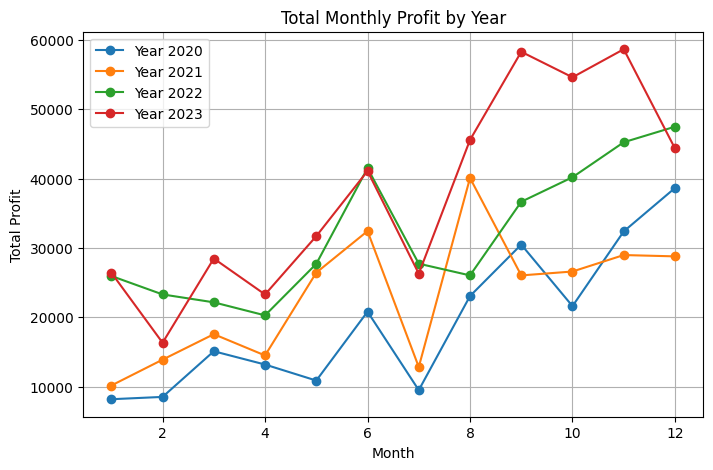

In [47]:
#Visualise the data
plt.figure(figsize = (8, 5))
for year in total_profit["Year Orders"].unique():
    monthly_data = total_profit[total_profit["Year Orders"] == year]
    plt.plot(monthly_data["Month Orders"], monthly_data["Profit"], marker = 'o', label = f'Year {year}')

plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Total Monthly Profit by Year')
plt.legend()
plt.grid(True)
plt.show()

The total monthly profit gained over each year is consistent over the past 4 years since 2020.
- The total monthly profit started low on january and gradually increased to first climax point in June.
- Then it dropped on July and increased again to peaks around September and December.

And not only that, the trend continues over the recent years and the profit rate increases higher than in previous years, which means the business is well-corporated and consistent.

### Monthly Average Discount Rate by Year

In [48]:
# Calculate average discount each month of each year when customer make purchase.
short_orders_2 = Orders_1[['Customer Name', 'Discount', 'Month Orders', 'Year Orders']]
average_discount = short_orders_2.groupby(['Year Orders', 'Month Orders'])['Discount'].mean().reset_index()
average_discount.head(5)

,Year Orders,Month Orders,Discount
0,2020,1,0.162249
1,2020,2,0.138936
2,2020,3,0.138312
3,2020,4,0.142768
4,2020,5,0.146308


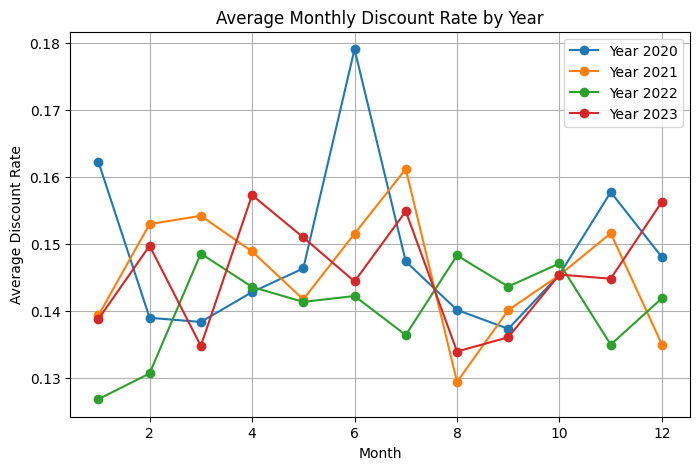

In [49]:
# Visualizing the data
plt.figure(figsize=(8, 5))
for year in average_discount['Year Orders'].unique():
    monthly_data = average_discount[average_discount['Year Orders'] == year]
    plt.plot(monthly_data['Month Orders'], monthly_data['Discount'], marker='o', label = f'Year {year}')

plt.xlabel('Month')
plt.ylabel('Average Discount Rate')
plt.title('Average Monthly Discount Rate by Year')
plt.legend()
plt.grid(True)
plt.show()

### Total Profit by Customer Segment

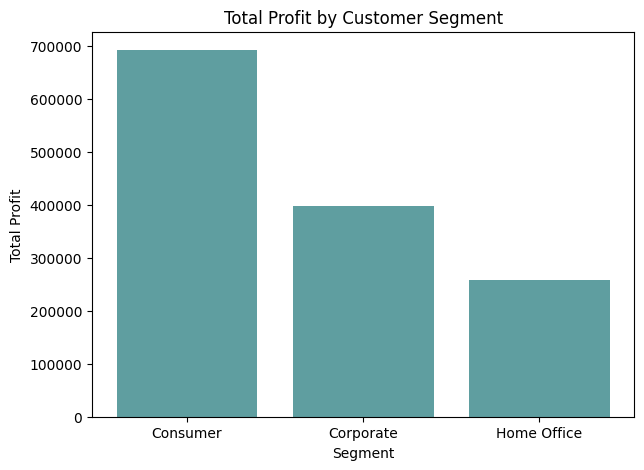

In [50]:
# Calculate profit base on Customer Segment
short_orders_3 = Orders_1[['Customer Name', 'Profit', 'Segment']]
total_profit_segment = short_orders_3.groupby('Segment')['Profit'].sum().reset_index()

#Visualise the data
plt.figure(figsize=(7, 5))
plt.bar(total_profit_segment['Segment'], total_profit_segment['Profit'], color = "cadetblue")
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.title('Total Profit by Customer Segment')
plt.show()


The total profit of the business is mostly gained by through Consumer segments, Corporate Segment and then Home Office. 
- The Consumer Segment produces the most profit for the company, and Home Office produces the lowest.

### Total profit by Region

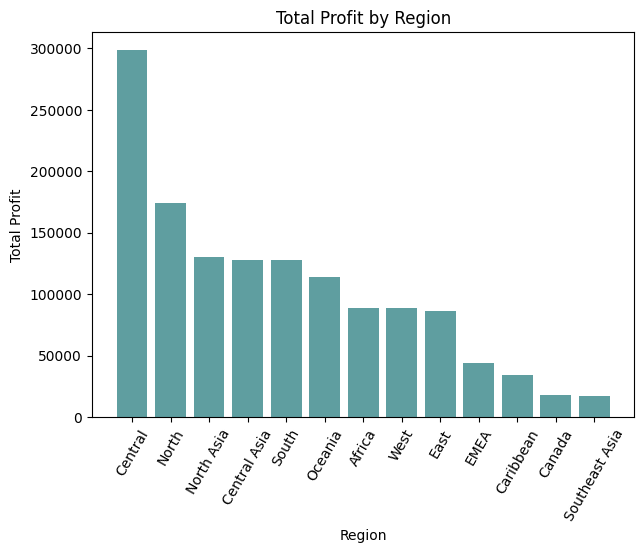

In [71]:
# Calculate profit base on Customer Segment
short_orders_3 = Orders_1[['Customer Name', 'Profit', 'Region']]
total_profit_segment = short_orders_3.groupby('Region')['Profit'].sum().sort_values(ascending = False).reset_index()

#Visualise the data
plt.figure(figsize=(7, 5))
plt.bar(total_profit_segment['Region'], total_profit_segment['Profit'], color = "cadetblue")
plt.xlabel('Region')
plt.xticks(rotation = 60)
plt.ylabel('Total Profit')
plt.title('Total Profit by Region')
plt.show()

### Total Profit by Sub-category

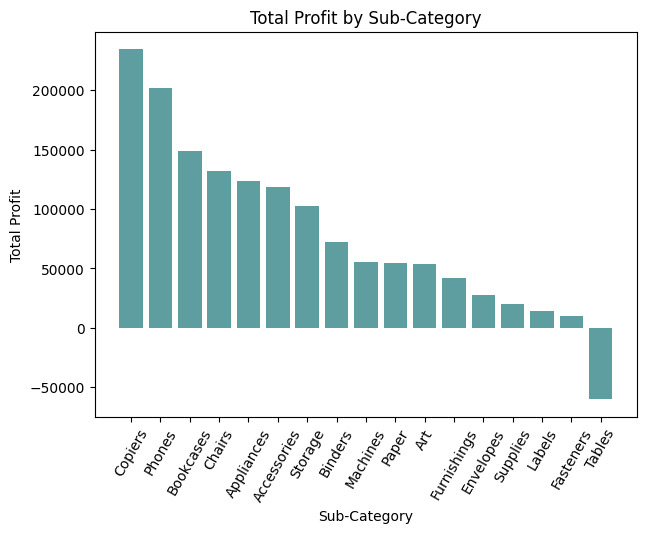

In [70]:
# Calculate profit base on Customer Segment
short_orders_4 = Orders_1[['Customer Name', 'Profit', 'Sub-Category']]
total_profit_segment = short_orders_4.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False).reset_index()

#Visualise the data
plt.figure(figsize=(7, 5))
plt.bar(total_profit_segment['Sub-Category'], total_profit_segment['Profit'], color = "cadetblue")
plt.xlabel('Sub-Category')
plt.xticks(rotation = 60)
plt.ylabel('Total Profit')
plt.title('Total Profit by Sub-Category')
plt.show()

### Check if there is a relationship between Shipping Cost/ Order Priority and Profit based on Customer Segments/Region/Sub-category

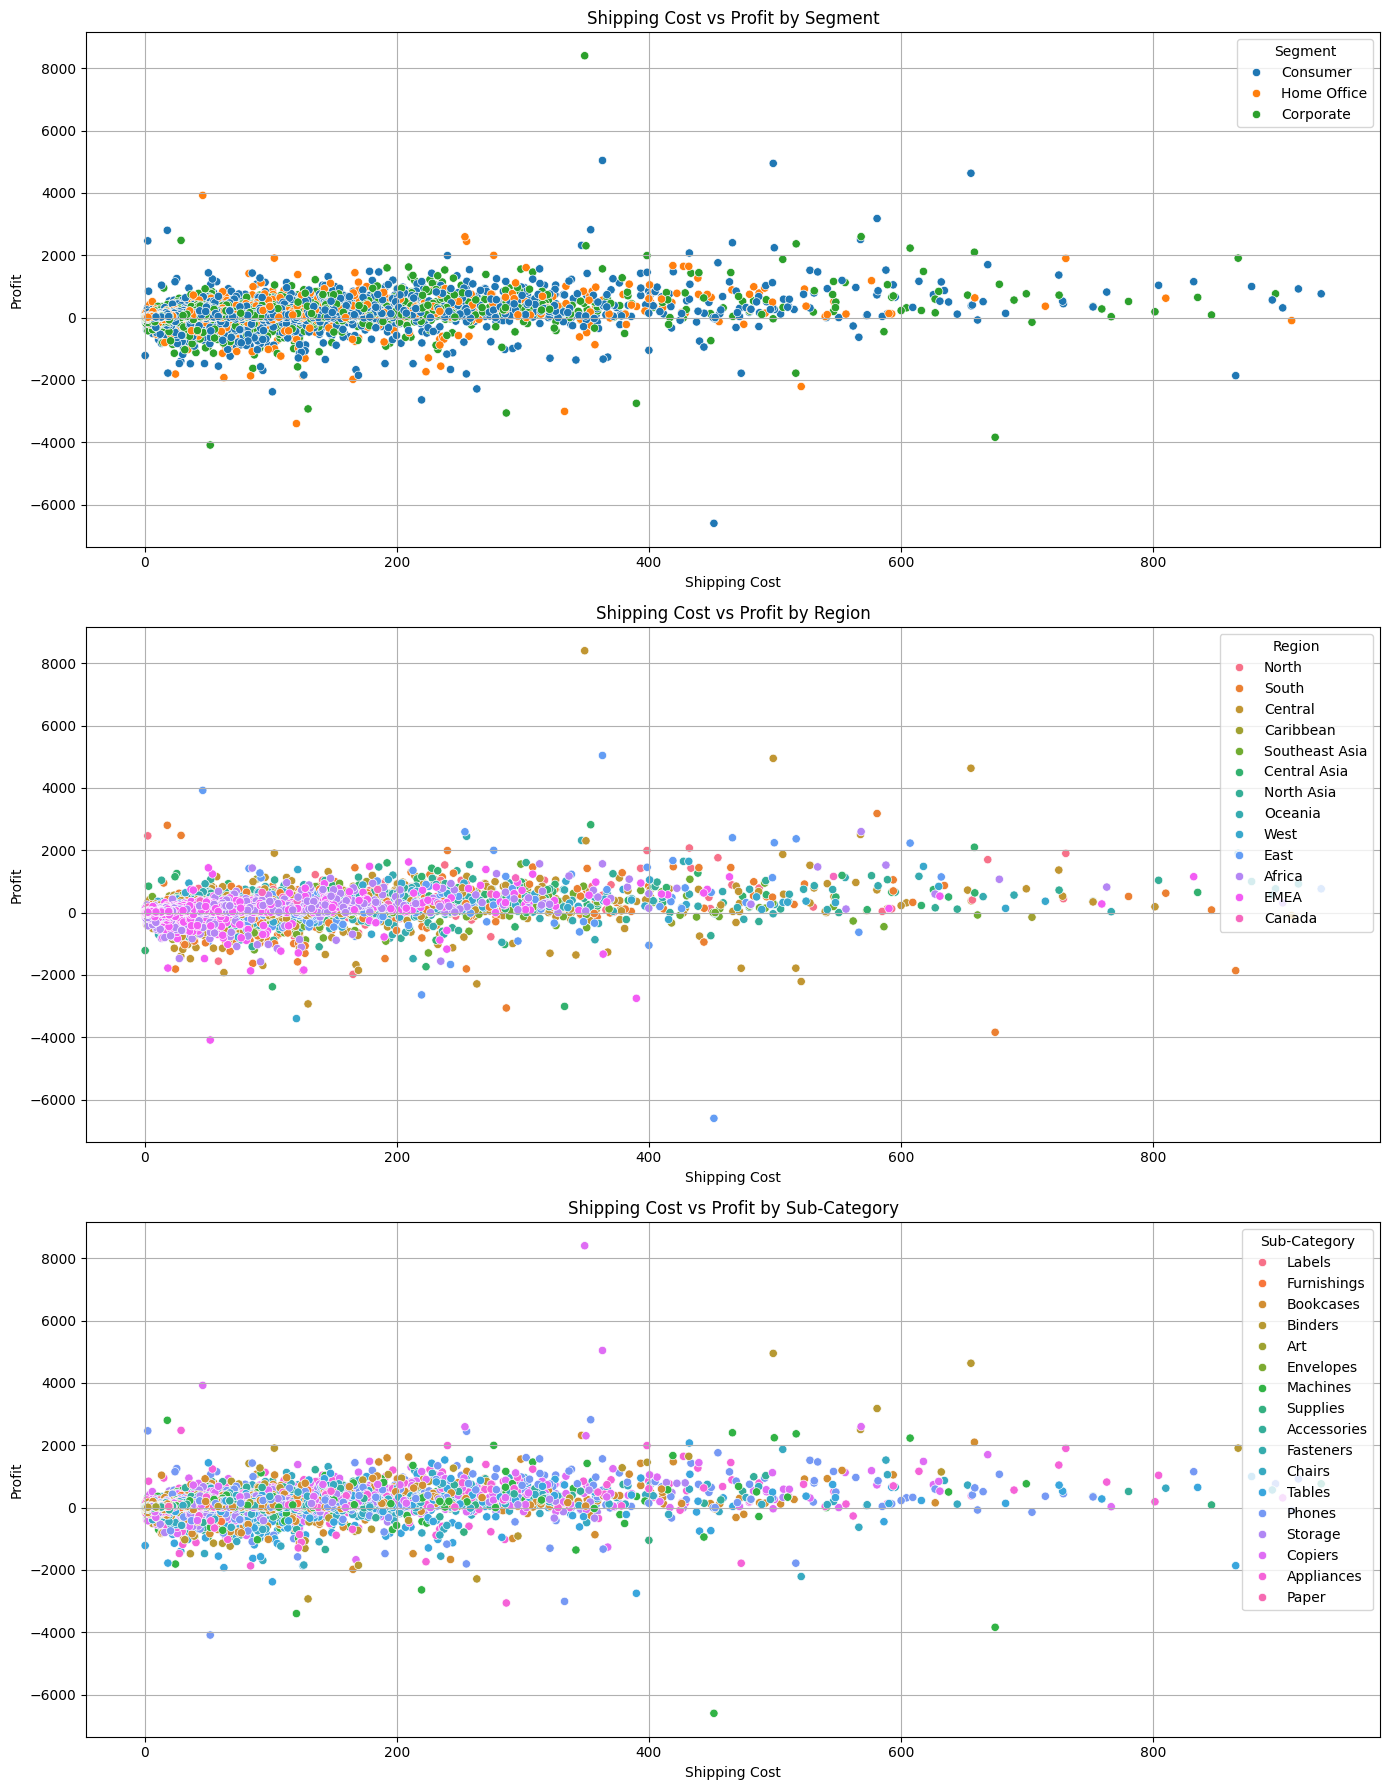

In [53]:
short_orders_6 = Orders_1[['Customer Name','Profit', 'Shipping Cost', 'Order Priority', 'Segment', 'Region', 'Sub-Category']]
# Visualizing the relationship based on Segment, Region, and Sub-Category
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Segment-based plot
sb.scatterplot(x='Shipping Cost', y='Profit', hue='Segment', data=short_orders_6, ax=axes[0])
axes[0].set_title('Shipping Cost vs Profit by Segment')
axes[0].set_xlabel('Shipping Cost')
axes[0].set_ylabel('Profit')
axes[0].grid(True)

# Region-based plot
sb.scatterplot(x='Shipping Cost', y='Profit', hue='Region', data=short_orders_6, ax=axes[1])
axes[1].set_title('Shipping Cost vs Profit by Region')
axes[1].set_xlabel('Shipping Cost')
axes[1].set_ylabel('Profit')
axes[1].grid(True)

# Sub-Category-based plot
sb.scatterplot(x='Shipping Cost', y='Profit', hue='Sub-Category', data=short_orders_6, ax=axes[2])
axes[2].set_title('Shipping Cost vs Profit by Sub-Category')
axes[2].set_xlabel('Shipping Cost')
axes[2].set_ylabel('Profit')
axes[2].grid(True)

plt.tight_layout()
plt.show()


There seems to have no pattern/relationship between Profit and Shipping Cost by Segments/Region/Subcategory, in the visualisations shown above.